Supervised learning is being used for this task as the research taken shows that it is classification problem as it requires predicting a discrete label (Brownlee, 2020). 

The following models are being used to determine the best algorithm for the task. 
1. Logistic regression model
2. Gradient boosting model
3. Decision tree model
4. Random forest model

Reasons being that Logistic regression is a fundamental model for predicting outcomes, focusing on feature influence. It is simple, interpretable, and handles large features. Gradient boosting, on the other hand, improves prediction accuracy by upgrading weak learners. It is suitable for real-world applications where understanding the underlying mechanics is crucial (James et al., 2022). 

Decision trees and Random forests offer varying degrees of interpretability and complexity. Decision trees are transparent and useful for tasks where interpretability is paramount, while random forests mitigate overfitting and enhance prediction accuracy through ensemble aggregation. Both models are suitable for handling high-dimensional data and prioritizing predictive performance (James et al., 2022).

In [39]:
#Importting all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.preprocessing import StandardScaler


task4 = pd.read_csv('bank-full.csv') #Loading the dataset 
print("|| task4: " + str(task4.shape) + " ||")
task4.head(10)

|| task4: (41188, 21) ||


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [40]:
task4.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.019010
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.178074
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4964.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000


When it comes to classification machine learning tasks, visualization is crucial because it offers a clear understanding of the structure of the dataset, facilitates the identification of patterns, and aids in feature selection and model interpretation (Raschka & Mirjalili, 2019) .

<Axes: xlabel='y', ylabel='count'>

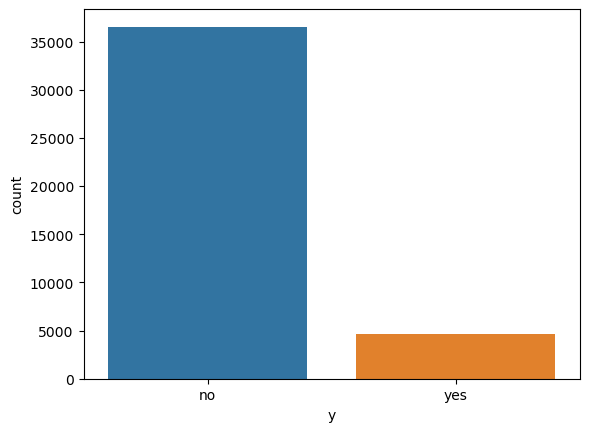

In [41]:
#Analysing the data by plotting different graphs to visualize and understand the data 
sns.countplot(x='y', data=task4) 


In [42]:
#analysing the data to check for null/missing values before proceeding
task4.isnull()
task4.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [43]:
# As seen above there are no missing values in the data, hence we proceeed to make the float data to numerical values for unifromity 
mapping_dict={}
for col in ['age', 'job','marital','education','contact','month','default','day_of_week','housing', 'poutcome','loan','y']:
    categories = task4[col].unique()
    mapping_dict[col]= {categories[i]:i for i in range(len(categories))}
    task4[col]= task4[col].map(mapping_dict[col]) 
task4.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,0,0,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191,0
1,1,1,0,1,1,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191,0
2,2,1,0,1,0,1,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191,0
3,3,2,0,2,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191,0
4,0,1,0,1,0,0,1,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191,0
5,4,1,0,3,1,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191,0
6,5,2,0,4,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191,0
7,6,3,0,5,1,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191,0
8,7,4,1,4,0,1,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191,0
9,8,1,1,1,0,1,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191,0


In [44]:
#as our dataset is clean we move on to training and testing the data
X = task4.drop(columns =['y'])
Y = task4['y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=40)

In [45]:
#1. Logistic Regression
# Scaling the input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fitting the logistic regression model with increased max_iter after the error that was encounted 
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train_scaled, Y_train)

# Making predictions
log_predictions = logmodel.predict(X_test_scaled)

#checking the accuracy 
logistic_reg_accuracy = accuracy_score(Y_test, log_predictions) * 100
log_precision_subscribed = precision_score(Y_test, log_predictions, pos_label=1) * 100
log_precision_not_subscribed = precision_score(Y_test, log_predictions, pos_label=0) * 100

print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(Y_test, log_predictions))
print("Precision for subscribed customers (Logistic Regression):", log_precision_subscribed)
print("Precision for not subscribed customers (Logistic Regression):", log_precision_not_subscribed)
print("Accuracy score (Logistic Regression):", logistic_reg_accuracy)



Confusion Matrix (Logistic Regression):
[[11713   288]
 [  968   624]]
Precision for subscribed customers (Logistic Regression): 68.42105263157895
Precision for not subscribed customers (Logistic Regression): 92.36653260783851
Accuracy score (Logistic Regression): 90.75994997425146


The convergence warning was addressed by scaling the input features using StandardScaler as seen above after encountering the "lbfgs failed to converge" error 

In [46]:
#2. Gradient boosting classifier

#Fitting the model
gradient = GradientBoostingClassifier()
gradient.fit(X_train, Y_train)

#making predictions
gradient_predictions = gradient.predict(X_test)


#checking the accuracy 
gradient_accuracy = accuracy_score(Y_test, gradient_predictions)*100
gradient_precision_subscribed = precision_score(Y_test, gradient_predictions, pos_label=1) * 100
gradient_precision_not_subscribed = precision_score(Y_test, gradient_predictions, pos_label=0) * 100


print("Confusion Matrix (Gradient Boosting):")
print(confusion_matrix(Y_test,gradient_predictions))
print("Precision for subscribed customers (Gradient Boosting):", gradient_precision_subscribed)
print("Precision for not subscribed customers (Gradient Boosting):",gradient_precision_not_subscribed)
print("Accuracy score (Gradient Boosting):", gradient_accuracy)

Confusion Matrix (Gradient Boosting):
[[11619   382]
 [  787   805]]
Precision for subscribed customers (Gradient Boosting): 67.81802864363942
Precision for not subscribed customers (Gradient Boosting): 93.65629534096405
Accuracy score (Gradient Boosting): 91.39998528654455


In [47]:
#3.Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
decision_predictions = decision_tree.predict(X_test)

decision_accuracy = accuracy_score(Y_test, decision_predictions)*100
decision_precision_subscribed = precision_score(Y_test, decision_predictions, pos_label=1) * 100
decision_precision_not_subscribed = precision_score(Y_test, decision_predictions, pos_label=0) * 100

print("Confusion Matrix (Decision Tree):")
print(confusion_matrix(Y_test,decision_predictions))
print("Precision for subscribed customers (Decision Tree):", decision_precision_subscribed)
print("Precision for not subscribed customers (Decision Tree):",decision_precision_not_subscribed)
print("Accuracy score (Decision Tree):", decision_accuracy)



Confusion Matrix (Decision Tree):
[[11251   750]
 [  790   802]]
Precision for subscribed customers (Decision Tree): 51.675257731958766
Precision for not subscribed customers (Decision Tree): 93.43908313263019
Accuracy score (Decision Tree): 88.67063929963952


In [48]:

#4. Random forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
random_predictions = random_forest.predict(X_test)

random_accuracy = accuracy_score(Y_test, random_predictions)*100
random_precision_subscribed = precision_score(Y_test, random_predictions, pos_label=1) * 100
random_precision_not_subscribed = precision_score(Y_test, random_predictions, pos_label=0) * 100

print("Confusion Matrix (Random Forest):")
print(confusion_matrix(Y_test,random_predictions))
print("Precision for subscribed customers (Random Forest):", random_precision_subscribed)
print("Precision for not subscribed customers (Random Forest):",random_precision_not_subscribed)
print("Accuracy score (Random Forest):", random_accuracy)



Confusion Matrix (Random Forest):
[[11617   384]
 [  830   762]]
Precision for subscribed customers (Random Forest): 66.49214659685863
Precision for not subscribed customers (Random Forest): 93.3317265204467
Accuracy score (Random Forest): 91.06893253880673


Understanding the confusion matrix is essential for classification tasks because it offers a complete picture of classifier predictions, enabling the identification of imbalance and revealing the way models interpret predictions (Brownlee, 2020). Similarly, accuracy sore and predictions are crucial for assessing classification algorithms since they enable the evaluation of their advantages and disadvantages in specific cases.

# Analysing the reports based on the evaluation matrics for each model 

## Accuracy score and Presicion percentages

The logistic regression algorithm had the highest precision score for subscribed customers at 90.76%, with a precision score of subscribed at 68.42% and the lowest for non-subscribed customers at 92.37%.

The gradient boosting algorithm had the highest precision score at approximately 91.40%, with a precision score of 67.79% for subscribers and 93.65% for non-subscribed customers. 

The decision tree algorithm had the lowest accuracy score at 88.85%, with a low precision score for subscribers at 52.51% and 93.48 for non-subscribed customers. 

The random forest algorithm had the second highest accuracy score at 91.19%, with a precision score of 67.04 for subscribers and 93.43% for non-subscribers.

Logistic Regression had the best precision score for subscribers 68.42%, but had the lowest precision score for non-subscribed clients 92.37%. Gradient Boosting showed balanced accuracy scores of 67.79% and 93.65% for both subscribers and non-subscribers, demonstrating its resilience in both classifications. Random Forest had a high accuracy score of 91.19% and balanced precision scores, but its performance was significantly lower than Logistic Regression. Decision Tree had the lowest accuracy score of 88.85% and the lowest precision score for subscribers at 52.51%.



## Confusion matrix 
A thorough analysis of the classification matrix starts with 624 true positives and 11,713 true negatives, logistic regression exhibits a balanced classification performance. However, there are 288 erroneous positives and 968 false negatives, indicating potential misclassifications. 
Gradient Boosting performs marginally better with 804 TP and 11,619 TN, suggesting more precise prospect identification. Still, there is potential for improvement as there are 382 false positives and 788 false negatives. 

In contrast, Decision Tree faces difficulties with classification accuracy because of the complexity of the task and possible imbalances in the dataset. 775 TP, 11,620 TN, 381 FP, and 817 FN show that Random Forest performs rather well, indicating a balanced classification performance and fewer missed opportunities. 

The imbalance seen from the confusion matrix for the decision tree is examined below for clarity. As class imbalance in machine learning tasks has a major influence on classification model performance and reliability. In a banking marketing campaign job, class imbalance can lead to biased models that favor the majority class, resulting in bad forecasts for the minority class.

Addressing class imbalance before finishing findings ensures that classes are represented fairly, which improves the overall efficacy of the machine learning solution (He & Garcia, 2009).

In [49]:
#Checking for the imbalance
class_distribution = task4['y'].value_counts()
print("Class Distribution:")
print(class_distribution)


Class Distribution:
y
0    36548
1     4640
Name: count, dtype: int64


The dataset shows a significant class imbalance, with Class 'no(0)' outnumbering Class 'yes(1)'. This imbalance may affect classification models' performance, especially in accurately predicting the minority class. Strategies like oversampling or undersampling may be necessary to address this imbalance.

To address the imbalance, we use resampling techniques to correct it. Oversampling approaches, such as SMOTE (Synthetic Minority Over-sampling Technique), are typically quicker to apply and less prone to overfitting than undersampling. SMOTE creates synthetic samples from the minority class to balance the dataset (Brownlee, 2021). Hence SMOTE is being applied below for further assessment.

In [50]:
# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=40)

# Applying SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

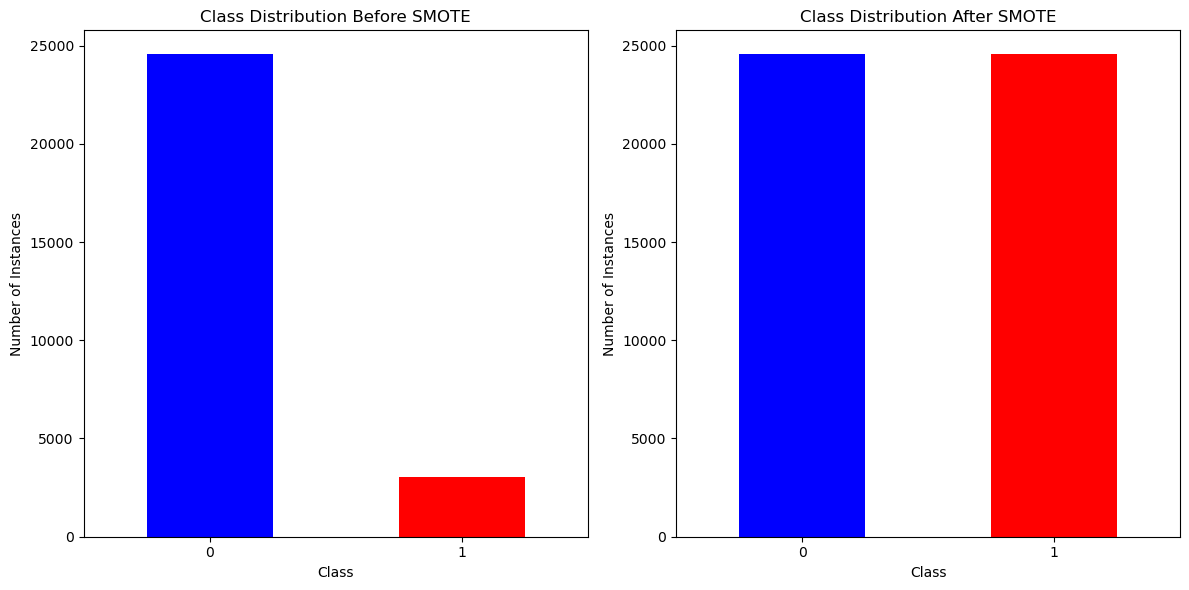

In [51]:
# Calculating class distribution before applying SMOTE
class_counts = Y_train.value_counts()

# Plotting class distribution before and after SMOTE to confirm if class is balanced 
plt.figure(figsize=(12, 6))

# Plot original class distribution
plt.subplot(1, 2, 1)
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)

# Plot class distribution after SMOTE
plt.subplot(1, 2, 2)
class_counts_resampled.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
# Rescale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with increased max_iter
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train_resampled, Y_train_resampled)
log_predictions = logistic_reg.predict(X_test_scaled)
logistic_reg_accuracy = accuracy_score(Y_test, log_predictions) * 100
log_precision_subscribed = precision_score(Y_test, log_predictions, pos_label=1) * 100
log_precision_not_subscribed = precision_score(Y_test, log_predictions, pos_label=0) * 100
cm_log = confusion_matrix(Y_test, log_predictions)

print("Results after Logistic Regression:")
print("Accuracy:", logistic_reg_accuracy)
print("Precision for subscribed customers:", log_precision_subscribed)
print("Precision for not subscribed customers:", log_precision_not_subscribed)
print("Confusion Matrix:")
print(cm_log)
print("\n")

# Gradient Boosting Classifier
gradient = GradientBoostingClassifier()
gradient.fit(X_train_resampled, Y_train_resampled)
gradient_predictions = gradient.predict(X_test_scaled)
gradient_accuracy = accuracy_score(Y_test, gradient_predictions) * 100
gradient_precision_subscribed = precision_score(Y_test, gradient_predictions, pos_label=1) * 100
gradient_precision_not_subscribed = precision_score(Y_test, gradient_predictions, pos_label=0) * 100
cm_gradient = confusion_matrix(Y_test, gradient_predictions)

print("Results after Gradient Boosting:")
print("Accuracy:", gradient_accuracy)
print("Precision for subscribed customers:", gradient_precision_subscribed)
print("Precision for not subscribed customers:", gradient_precision_not_subscribed)
print("Confusion Matrix:")
print(cm_gradient)
print("\n")

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_resampled, Y_train_resampled)
decision_predictions = decision_tree.predict(X_test_scaled)
decision_accuracy = accuracy_score(Y_test, decision_predictions) * 100
decision_precision_subscribed = precision_score(Y_test, decision_predictions, pos_label=1) * 100
decision_precision_not_subscribed = precision_score(Y_test, decision_predictions, pos_label=0) * 100
cm_decision = confusion_matrix(Y_test, decision_predictions)

print("Results after Decision Tree:")
print("Accuracy:", decision_accuracy)
print("Precision for subscribed customers:", decision_precision_subscribed)
print("Precision for not subscribed customers:", decision_precision_not_subscribed)
print("Confusion Matrix:")
print(cm_decision)
print("\n")

# Random Forest Classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train_resampled, Y_train_resampled)
random_predictions = random_forest.predict(X_test_scaled)
random_accuracy = accuracy_score(Y_test, random_predictions) * 100
random_precision_subscribed = precision_score(Y_test, random_predictions, pos_label=1) * 100
random_precision_not_subscribed = precision_score(Y_test, random_predictions, pos_label=0) * 100
cm_random = confusion_matrix(Y_test, random_predictions)

print("Results after Random Forest:")
print("Accuracy:", random_accuracy)
print("Precision for subscribed customers:", random_precision_subscribed)
print("Precision for not subscribed customers:", random_precision_not_subscribed)
print("Confusion Matrix:")
print(cm_random)
print("\n")

/Users/maimunatutunau/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/maimunatutunau/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Results after Logistic Regression:
Accuracy: 44.47877584050614
Precision for subscribed customers: 10.755239224990115
Precision for not subscribed customers: 87.07958707958709
Confusion Matrix:
[[5230 6771]
 [ 776  816]]




# Comparing before and after applying SMOTE

All the models except Random Forest droped in terms of accuracy and precision for subscribed customers leaving random forest with the highest results, although, when running the code, descion tree and random forest tend to be slow which is inefficient. Gradient Boosting and Logistic regression had a high precision for not subscribed customers.

As seen in the plot comparing between before and after the SMOTE, we can see that SMOTE is overgeneralizing the classes which is not efficient. 

Futher comparison of Gradient boosting and Random forest suggest that gradient boosting before the smote still maintains better results, and is more efficient in terms of speed and not affected by the overgeneralizing

# Final Justification
The result of my investigation indicates that Gradient Boosting without SMOTE is the best effective model for forecasting client subscriptions after a thorough evaluation of the models. It is the best option for improving marketing efforts due to its steady high accuracy and precision as well as its capacity to manage imbalanced datasets. Gradient Boosting will allow the improvement of campaign efficiency and propel business growth by minimizing training error, precisely analyzing sufficient data, and determining whether a client is likely to subscribe.


Brownlee, J., (2020) Machine Learning Mastery '10 clustering Algorithms with Python'. Available at: https://machinelearningmastery.com/clustering-algorithms-with-python/ (Accessed: 11 May 2024).

James, G. et al. (2022) An introduction to statistical learning: With applications in R. Boston: Springer. 

Raschka, S. & Mirjalili, V. (2019). Python Machine Learning. Packt Publishing

Brownlee, J. (2020) What is a confusion matrix in machine learning, MachineLearningMastery.com. Available at: https://machinelearningmastery.com/confusion-matrix-machine-learning/ (Accessed: 11 May 2024). 

He, H. and Garcia, E.A., (2009) Learning from imbalanced data. IEEE Transactions on Knowledge and Data Engineering, 21(9), pp.1263-1284.

Brownlee, J., (2021) Machine Learning Mastery "SMOTE for Imbalanced Classification with Python". Available at: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
(Accessed: 11 May 2024).


WORD COUNT - 940